<a href="https://colab.research.google.com/github/05satyam/AI-ML/blob/main/NLP_Pipeline_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing (NLP) Pipeline: Detailed Explanation

This document provides a comprehensive guide to building an NLP pipeline, from loading raw data to deploying a model. Each step is explained in detail, with practical examples.




## **Workflow for the NLP Pipeline**

```plaintext
1. Load the Data
   - Import data from files, APIs, or databases.
   - Ensure the data is structured for processing.

2. Clean the Data
   - Standardize text: lowercase, remove noise (special characters, stopwords).
   - Normalize text using stemming or lemmatization.

3. Perform Exploratory Data Analysis (EDA)
   - Understand word distributions using frequency plots or WordClouds.
   - Visualize text length or character counts for insights.

4. Engineer Features
   - Use vectorization techniques like Bag of Words, TF-IDF, or embeddings.
   - Experiment with pre-trained embeddings like Word2Vec or contextual embeddings like BERT.

5. Build Models
   - Select an algorithm (e.g., Logistic Regression, Transformer models).
   - Train and validate on prepared datasets.

6. Optimize Models
   - Perform hyperparameter tuning (Grid Search, Random Search).
   - Experiment with model regularization or dropout layers for robustness.

7. Evaluate Performance
   - Use task-specific metrics: Precision, Recall, F1-Score, BLEU, ROUGE.
   - Compare different models and approaches.

8. Deploy the Model
   - Save trained models for reuse (e.g., joblib, pickle).
   - Deploy via APIs (e.g., Flask, FastAPI) or apps (Streamlit).

9. Monitor and Maintain
   - Track data drift, user feedback, and performance metrics.
   - Periodically retrain models with updated datasets.
```




## **1. Loading the Data**
- **Objective**: Load raw text data from different sources.
- **Common Sources**:
  - **Files**: Text files, CSV, JSON, XML, etc.
  - **APIs**: Fetching data using HTTP requests.
  - **Web Scraping**: Extracting text from websites.
  - **Databases**: Querying structured or unstructured data.

### Example: Loading Data from a CSV File
```python
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('text_data.csv')
texts = data['text_column']
```
---

## **2. Data Cleaning**
- **Objective**: Prepare raw text for further analysis by removing irrelevant or noisy elements.

### Common Steps in Data Cleaning
1. **Lowercasing**: Convert all text to lowercase for consistency.
2. **Removing Special Characters**: Remove numbers, punctuation, and other unwanted symbols.
3. **Stopword Removal**: Remove frequently occurring words (e.g., "and," "the") that do not add significant meaning.
4. **Lemmatization or Stemming**:
   - Lemmatization reduces words to their base form (e.g., "running" -> "run").
   - Stemming removes suffixes (e.g., "running" -> "runn").

### Example: Text Cleaning in Python
```python
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

texts = texts.apply(clean_text)
```
---

## **3. Exploratory Data Analysis (EDA)**
- **Objective**: Analyze the text to understand its structure, content, and distribution.

### Techniques
- **Word Frequency Analysis**: Identify the most common words in the text.
- **Text Length Analysis**: Understand the distribution of text lengths.
- **WordCloud Visualization**: Display frequently occurring words visually.

### Example: WordCloud
```python
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordCloud
text = ' '.join(texts)
wordcloud = WordCloud().generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
```
---

## **4. Feature Engineering**
- **Objective**: Convert text into numerical representations that can be used by machine learning models.

### Common Techniques
1. **Bag of Words (BoW)**:
   - Counts word occurrences without considering word order.
2. **TF-IDF (Term Frequency-Inverse Document Frequency)**:
   - Weighs words based on frequency and importance across documents.
3. **Word Embeddings**:
   - Pre-trained embeddings like Word2Vec, GloVe, or FastText.
4. **Contextual Embeddings**:
   - Models like BERT or GPT for capturing context.

### Example: TF-IDF Vectorization
```python
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(texts)
```

### Example: Word Embeddings with `gensim`
```python
from gensim.models import Word2Vec

# Tokenize text
tokenized_texts = [text.split() for text in texts]

# Train Word2Vec
model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)
```
---

## **5. Modeling**
- **Objective**: Build NLP models for specific tasks.
- **Tasks**:
  - **Classification**: Sentiment analysis, spam detection.
  - **Clustering**: Grouping similar documents.
  - **Generation**: Chatbots, text summarization.

### Common Algorithms
1. **Traditional Models**: Logistic Regression, Naive Bayes, SVM.
2. **Deep Learning Models**: LSTM, GRU, Transformer-based architectures.

### Example: Logistic Regression for Text Classification
```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
```

### Example: Transformer-based Model
```python
from transformers import pipeline

# Pre-trained transformer for text classification
classifier = pipeline("sentiment-analysis")

# Predict
results = classifier(["I love NLP!", "I hate this course."])
print(results)
```
---

## **6. Model Optimization**
- **Objective**: Improve model performance by tuning hyperparameters and techniques.

### Techniques
1. **Grid Search**: Systematic search over predefined hyperparameter values.
2. **Random Search**: Randomly sample hyperparameters.
3. **Bayesian Optimization**: Probabilistic approach to finding the best hyperparameters.

### Example: Grid Search
```python
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
```
---

## **7. Evaluation**
- **Objective**: Measure the effectiveness of the model.
- **Metrics**:
  - **Classification**: Accuracy, Precision, Recall, F1-Score.
  - **Clustering**: Silhouette Score.
  - **Generation**: BLEU, ROUGE, Perplexity.

---

## **8. Deployment**
- **Objective**: Make the model available for real-world use.
- **Approaches**:
  - **Frameworks**: Flask, FastAPI, Streamlit.
  - **Model Saving**: Use `joblib` or `pickle`.

### Example: Saving a Model
```python
import joblib

# Save model
joblib.dump(model, 'text_classifier.pkl')

# Load model
model = joblib.load('text_classifier.pkl')
```
---

## **9. Monitoring and Maintenance**
- **Objective**: Ensure the model continues to perform effectively after deployment.
- **Strategies**:
  - Monitor for data drift.
  - Retrain with updated data.
  - Collect user feedback.

---

This detailed guide outlines the full NLP pipeline, from raw data to deployment. 

In [1]:
import pandas as pd

In [9]:
#creating sample data for test
import pandas as pd

# Create sample data for NLP tasks
data = {
    "text_column": [
        "One piece do exists!",
        "Machine learning is fascinating.",
        "Deep learning powers many AI applications.",
        "Natural language understanding is a subset of NLP.",
        "Text data requires preprocessing before modeling."
    ],
    "label": [1, 1, 1, 1, 0]  # Sample binary labels for classification
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
file_path = "./sample_nlp_data.csv"
df.to_csv(file_path, index=False)

file_path


'./sample_nlp_data.csv'

In [10]:

data = pd.read_csv('./sample_nlp_data.csv')
data

,text_column,label
0,I love natural language processing!,1
1,Machine learning is fascinating.,1
2,Deep learning powers many AI applications.,1
3,Natural language understanding is a subset of ...,1
4,Text data requires preprocessing before modeling.,0


from matplotlib import pyplot as plt
data['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('text_column').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['text_column'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='label', y='text_column', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [11]:
texts = data['text_column']
labels = data['label']

In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [6]:
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [7]:
def clean_data(text):
  text = text.lower() # change to lower
  text = re.sub(r'\d+' , '', text) # remove diggits
  text = re.sub(r'[^\w\s]', '', text) # remove punctuation
  text = ''.join([lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stopwords])
  return text



In [17]:
texts = texts.apply(clean_data)

In [18]:
data

,text_column,label
0,I love natural language processing!,1
1,Machine learning is fascinating.,1
2,Deep learning powers many AI applications.,1
3,Natural language understanding is a subset of ...,1
4,Text data requires preprocessing before modeling.,0


In [19]:
texts

,text_column
0,lovenaturallanguageprocessing
1,machinelearningfascinating
2,deeplearningpowermanyaiapplication
3,naturallanguageunderstandingsubsetnlp
4,textdatarequirespreprocessingmodeling


lovenaturallanguageprocessing machinelearningfascinating deeplearningpowermanyaiapplication naturallanguageunderstandingsubsetnlp textdatarequirespreprocessingmodeling


(-0.5, 799.5, 399.5, -0.5)

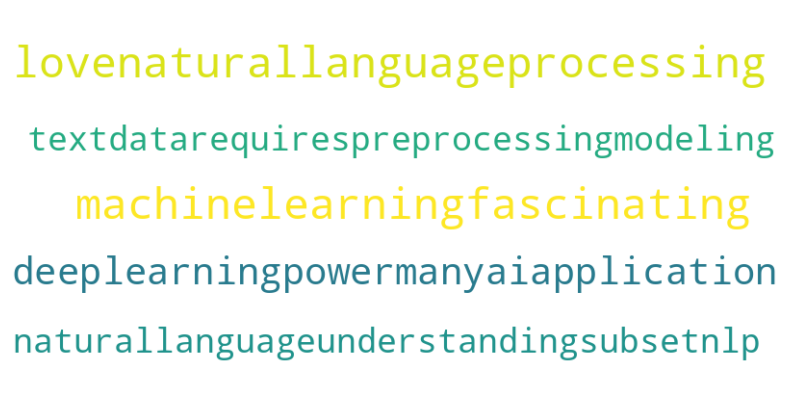

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(texts)
print(text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text) # width=800, height=400, background_color='white' ==> optional

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

In [32]:
X.shape


(5, 5)

In [33]:
X[0].toarray()

array([[0., 1., 0., 0., 0.]])

In [34]:
from gensim.models import Word2Vec

tokenize_model = [text.split() for text in texts]
model = Word2Vec(tokenize_model, vector_size=100, window=5, min_count=1, workers=4)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [36]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [37]:
from transformers import pipeline

# Pre-trained transformer for text classification
classifier = pipeline("sentiment-analysis")

# Predict
results = classifier(["I love NLP!", "I hate this course."])
print(results)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998449087142944}, {'label': 'NEGATIVE', 'score': 0.9997019171714783}]


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=3)
grid.fit(X_train, y_train)

print(grid)


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, 